<center>

Aprendizaje de máquina - ITAM

### Cambio climático

Valeria Durán Rubio & Iván García Alba

</center>

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


##### Cargamos datos

In [2]:
# Load the dataset
file_path = './data/climate_change_dataset.csv'
climate_data = pd.read_csv(file_path)

# Display basic information about the dataset
climate_data_info = climate_data.info()
climate_data_head = climate_data.head()

climate_data_info, climate_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

(None,
      Year Month  Avg_Temp (°C)       Max_Temp (°C)       Min_Temp (°C)  \
 0     NaN   1.0      -3.460516  33.056918907353285                 NaN   
 1  2020.0   2.0            NaN  25.901916083791665  3.1739745975583844   
 2  2020.0   3.0       7.869842   18.63424149980029   10.42485208665568   
 3     NaN   4.0      -0.049863  13.030562376875533  -9.196433418151315   
 4  2020.0   5.0      19.895067   35.88212887551623  20.067999652410148   
 
    Precipitation (mm)       Humidity (%)    Wind_Speed (m/s)  \
 0  184.89969755743786  89.62081302618182   9.742885739415993   
 1   2.957244192049635  95.17102000342224   10.64824600272703   
 2                 NaN                NaN                 NaN   
 3   102.4544605414934            Unknown   0.898697634212508   
 4  185.72922332959365  73.99994640624561  13.128301152215258   
 
   Solar_Irradiance (W/m²)     Cloud_Cover (%)  CO2_Concentration (ppm)  \
 0                     NaN  58.530797670209076                      NaN   

##### Preprocesamiento

In [3]:
# Check for missing values and their proportions
missing_values = climate_data.isnull().sum() / len(climate_data) * 100

# Convert problematic columns to numeric where applicable, replacing non-numeric values with NaN
columns_to_convert = [
    "Max_Temp (°C)", "Min_Temp (°C)", "Precipitation (mm)", "Humidity (%)",
    "Wind_Speed (m/s)", "Solar_Irradiance (W/m²)", "Cloud_Cover (%)",
    "Latitude", "Longitude", "Altitude (m)", "Proximity_to_Water (km)",
    "Vegetation_Index", "ENSO_Index", "Particulate_Matter (µg/m³)", "Sea_Surface_Temp (°C)"
]

for col in columns_to_convert:
    climate_data[col] = pd.to_numeric(climate_data[col], errors='coerce')

# Summarize the cleaned dataset
cleaned_data_info = climate_data.info()
cleaned_data_missing_values = climate_data.isnull().sum()

missing_values, cleaned_data_info, cleaned_data_missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               45 non-null     float64
 4   Min_Temp (°C)               44 non-null     float64
 5   Precipitation (mm)          48 non-null     float64
 6   Humidity (%)                44 non-null     float64
 7   Wind_Speed (m/s)            50 non-null     float64
 8   Solar_Irradiance (W/m²)     47 non-null     float64
 9   Cloud_Cover (%)             48 non-null     float64
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    46 non-null     float64
 12  Longitude                   49 non-null     float64
 13  Altitude (m)                48 non-nu

(Year                           9.433962
 Month                          9.433962
 Avg_Temp (°C)                 13.207547
 Max_Temp (°C)                 13.207547
 Min_Temp (°C)                 15.094340
 Precipitation (mm)             7.547170
 Humidity (%)                  15.094340
 Wind_Speed (m/s)               3.773585
 Solar_Irradiance (W/m²)        9.433962
 Cloud_Cover (%)                7.547170
 CO2_Concentration (ppm)       11.320755
 Latitude                      11.320755
 Longitude                      5.660377
 Altitude (m)                   7.547170
 Proximity_to_Water (km)       11.320755
 Urbanization_Index             5.660377
 Vegetation_Index               5.660377
 ENSO_Index                     5.660377
 Particulate_Matter (µg/m³)     5.660377
 Sea_Surface_Temp (°C)         13.207547
 dtype: float64,
 None,
 Year                          5
 Month                         5
 Avg_Temp (°C)                 7
 Max_Temp (°C)                 8
 Min_Temp (°C)          

In [4]:
# Crear una copia del conjunto de datos para preservar el original
imputed_data = climate_data.copy()

# Reemplazar valores como "99999" o "Unknown" con NaN para manejo adecuado
imputed_data.replace({"99999": np.nan, "Unknown": np.nan}, inplace=True)

# Convertir columnas numéricas mal clasificadas a valores numéricos
numeric_columns = [
    "Avg_Temp (°C)", "Max_Temp (°C)", "Min_Temp (°C)", "Precipitation (mm)", 
    "Humidity (%)", "Wind_Speed (m/s)", "Solar_Irradiance (W/m²)", 
    "Cloud_Cover (%)", "CO2_Concentration (ppm)", "Latitude", "Longitude",
    "Altitude (m)", "Proximity_to_Water (km)", "Vegetation_Index", 
    "ENSO_Index", "Particulate_Matter (µg/m³)", "Sea_Surface_Temp (°C)"
]

for column in numeric_columns:
    imputed_data[column] = pd.to_numeric(imputed_data[column], errors="coerce")

# Imputar columnas numéricas usando la mediana
numeric_imputer = SimpleImputer(strategy="median")
imputed_data[numeric_columns] = numeric_imputer.fit_transform(imputed_data[numeric_columns])

# Imputar columnas categóricas (e.g., Year, Month) con la moda
categorical_columns = ["Year", "Month"]
categorical_imputer = SimpleImputer(strategy="most_frequent")
imputed_data[categorical_columns] = categorical_imputer.fit_transform(imputed_data[categorical_columns])

# Realizar interpolación para datos temporales, si corresponde
if "CO2_Concentration (ppm)" in imputed_data.columns:
    imputed_data["CO2_Concentration (ppm)"] = imputed_data["CO2_Concentration (ppm)"].interpolate(method="linear")

# Verificar valores faltantes restantes
remaining_missing = imputed_data.isnull().sum()

# Exportar el conjunto de datos limpio (opcional)
output_path = "./data/cleaned_climate_dataset.csv"  # Cambia esto a donde quieras guardar el archivo
imputed_data.to_csv(output_path, index=False)

# Imprimir resumen
print("Valores faltantes restantes por columna:")
print(remaining_missing)
print(f"Archivo limpio guardado en: {output_path}")


Valores faltantes restantes por columna:
Year                          0
Month                         0
Avg_Temp (°C)                 0
Max_Temp (°C)                 0
Min_Temp (°C)                 0
Precipitation (mm)            0
Humidity (%)                  0
Wind_Speed (m/s)              0
Solar_Irradiance (W/m²)       0
Cloud_Cover (%)               0
CO2_Concentration (ppm)       0
Latitude                      0
Longitude                     0
Altitude (m)                  0
Proximity_to_Water (km)       0
Urbanization_Index            3
Vegetation_Index              0
ENSO_Index                    0
Particulate_Matter (µg/m³)    0
Sea_Surface_Temp (°C)         0
dtype: int64
Archivo limpio guardado en: ./data/cleaned_climate_dataset.csv


## EDA

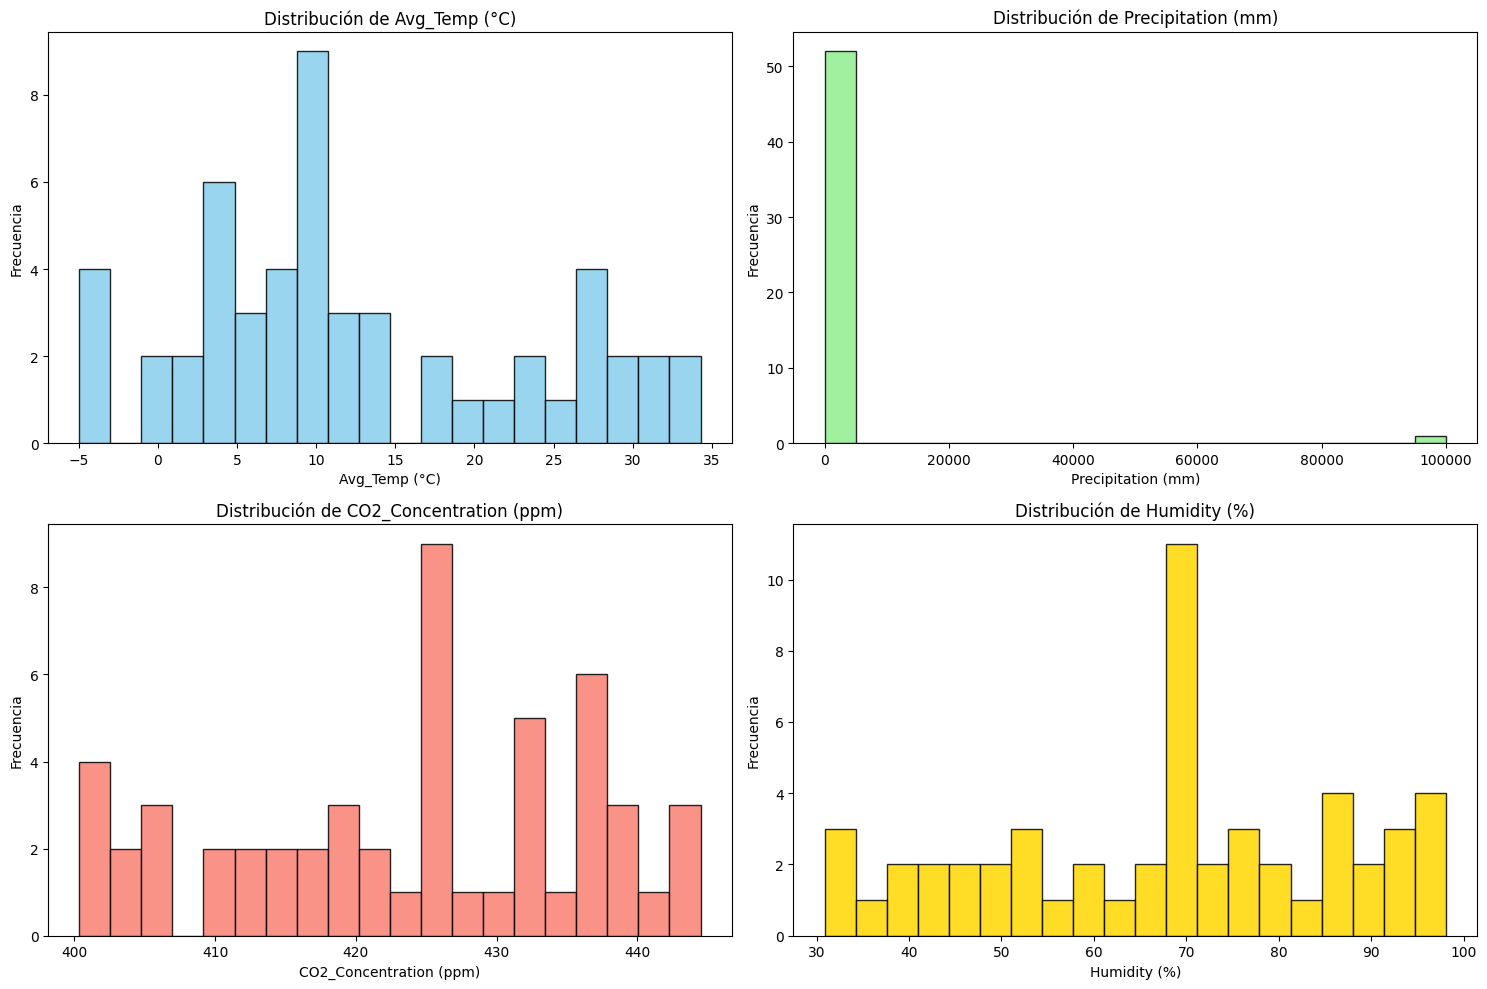

In [5]:
# Filtrar columnas clave y asegurarnos de que sean numéricas
variables_clave = ["Avg_Temp (°C)", "Precipitation (mm)", "CO2_Concentration (ppm)", "Humidity (%)"]
for column in variables_clave:
    imputed_data[column] = pd.to_numeric(imputed_data[column], errors='coerce')

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Definir una lista de colores alegres para las variables
colores = ["skyblue", "lightgreen", "salmon", "gold"]

# Crear un histograma para cada variable clave con colores personalizados
for i, (variable, color) in enumerate(zip(variables_clave, colores), 1):
    plt.subplot(2, 2, i)  # Crear subgráficos 2x2
    plt.hist(imputed_data[variable].dropna(), bins=20, alpha=0.85, edgecolor='black', color=color)  # Usar color personalizado
    plt.title(f"Distribución de {variable}", fontsize=12)
    plt.xlabel(variable, fontsize=10)
    plt.ylabel("Frecuencia", fontsize=10)

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


Correlaciones entre variables

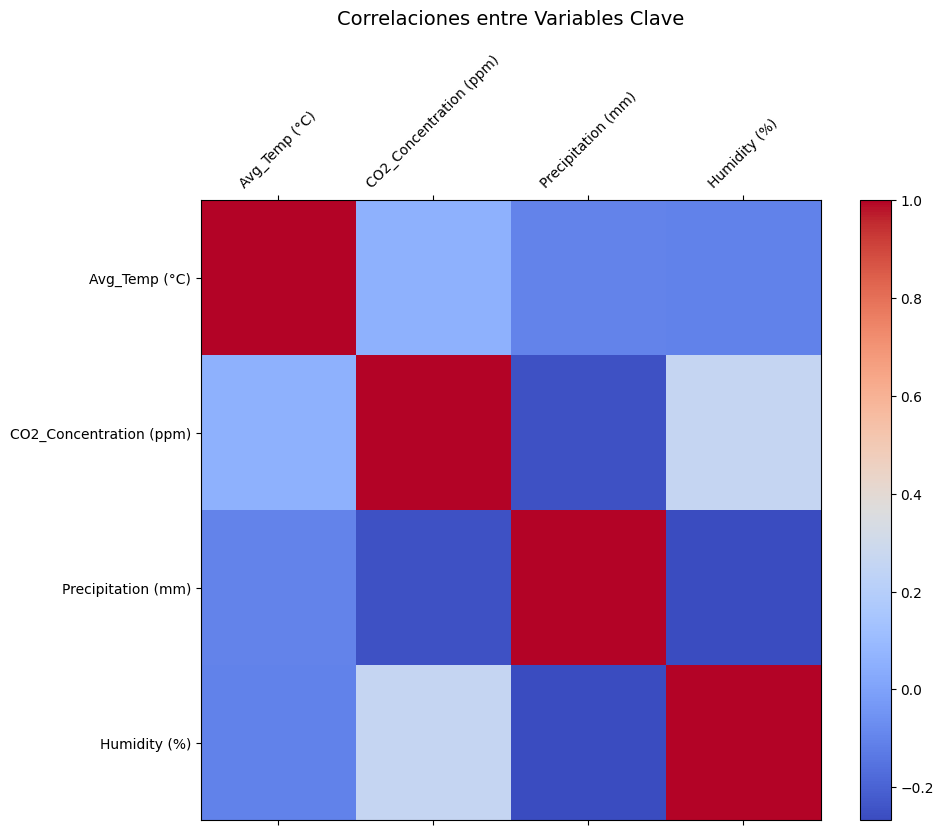

In [6]:
# Asegurarse de que todas las columnas relevantes sean numéricas
variables_interes = ["Avg_Temp (°C)", "CO2_Concentration (ppm)", "Precipitation (mm)", "Humidity (%)"]
for column in variables_interes:
    imputed_data[column] = pd.to_numeric(imputed_data[column], errors='coerce')

# Recalcular la matriz de correlación para todas las columnas numéricas
correlation_matrix = imputed_data.corr(numeric_only=True)

# Filtrar la matriz para mostrar correlaciones relacionadas con las variables de interés
correlation_with_interest = correlation_matrix.loc[variables_interes, variables_interes]

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_with_interest, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(variables_interes)), variables_interes, rotation=45, fontsize=10)
plt.yticks(range(len(variables_interes)), variables_interes, fontsize=10)
plt.title("Correlaciones entre Variables Clave", fontsize=14, pad=20)
plt.show()


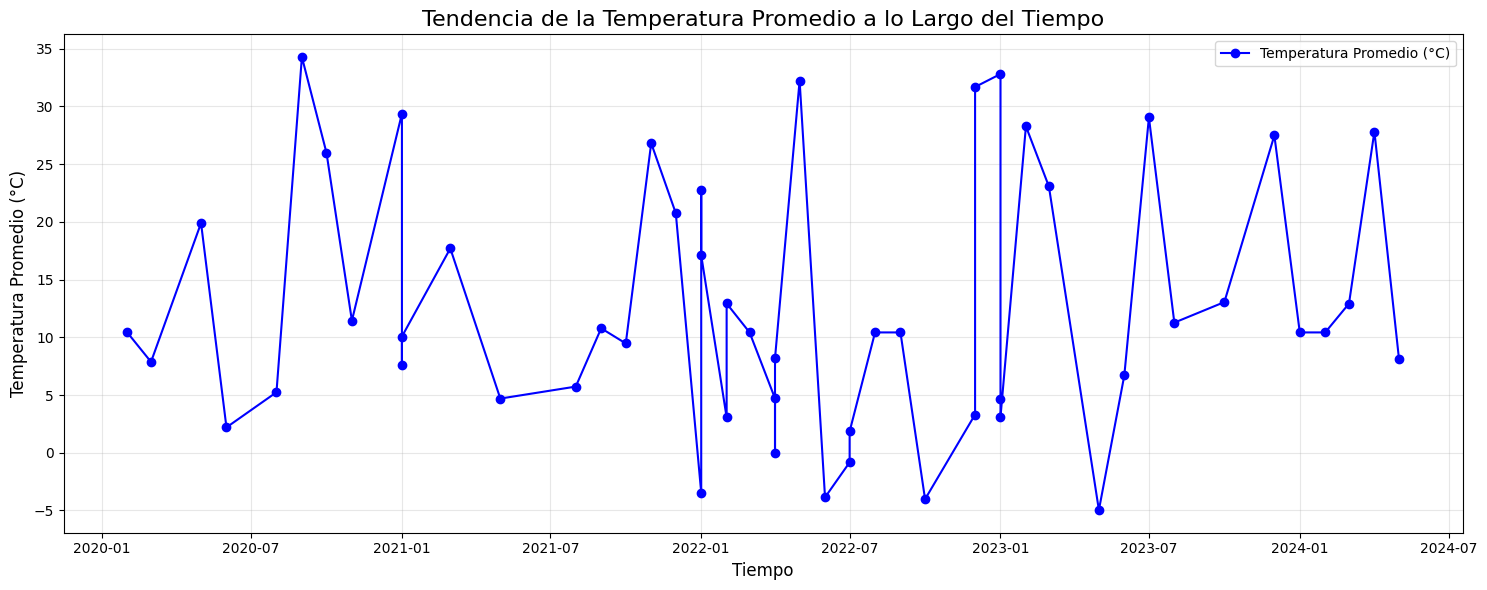

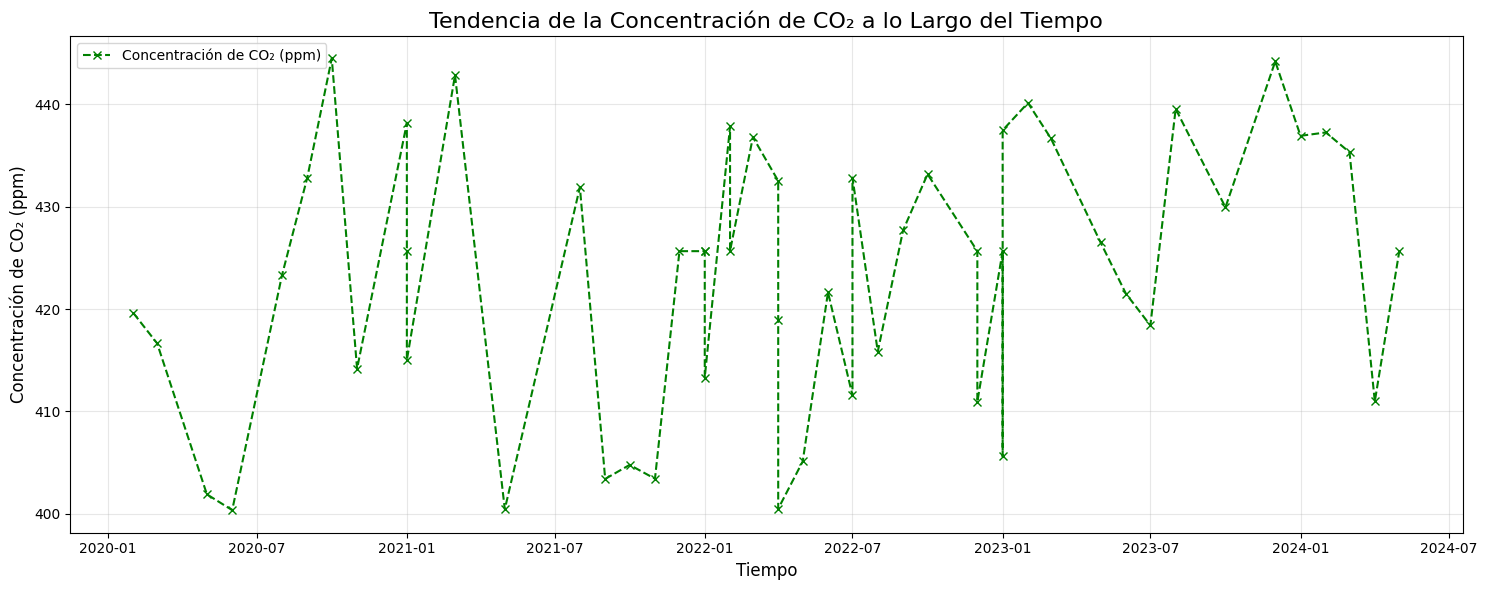

In [7]:
# Crear una columna de tiempo combinada
imputed_data["Year"] = pd.to_numeric(imputed_data["Year"], errors="coerce")
imputed_data["Month"] = pd.to_numeric(imputed_data["Month"], errors="coerce")
imputed_data["Time"] = pd.to_datetime(imputed_data[["Year", "Month"]].assign(Day=1), errors="coerce")

# Filtrar los datos relevantes para las gráficas
data_for_plot = imputed_data.sort_values("Time")[["Time", "Avg_Temp (°C)", "CO2_Concentration (ppm)"]]

# Crear la gráfica de líneas
plt.figure(figsize=(15, 6))
plt.plot(data_for_plot["Time"], data_for_plot["Avg_Temp (°C)"], label="Temperatura Promedio (°C)", color="blue", marker='o')
plt.title("Tendencia de la Temperatura Promedio a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Temperatura Promedio (°C)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Crear la gráfica de líneas para la concentración de CO₂
plt.figure(figsize=(15, 6))
plt.plot(data_for_plot["Time"], data_for_plot["CO2_Concentration (ppm)"], label="Concentración de CO₂ (ppm)", color="green", linestyle="--", marker='x')
plt.title("Tendencia de la Concentración de CO₂ a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Concentración de CO₂ (ppm)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()



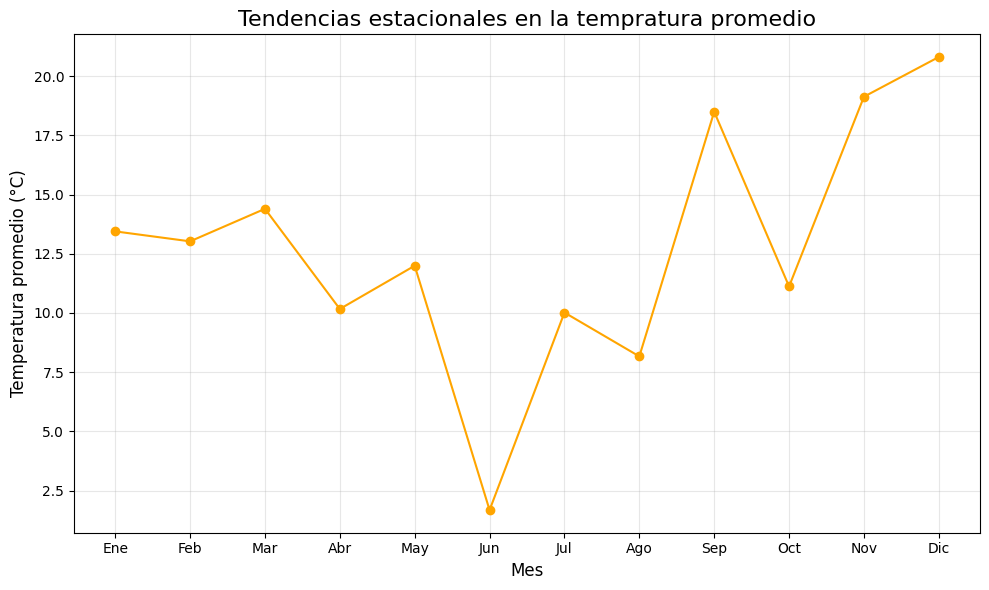

In [8]:
# Extract the month from the time column to analyze seasonal trends
imputed_data["Month"] = imputed_data["Time"].dt.month

# Group data by month to calculate mean temperatures for each month
seasonal_trends = imputed_data.groupby("Month")["Avg_Temp (°C)"].mean()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
plt.plot(seasonal_trends.index, seasonal_trends.values, marker='o', color='orange')
plt.title("Tendencias estacionales en la tempratura promedio", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Temperatura promedio (°C)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Modelos para predecir la temperatura promedio y el CO_2

In [9]:
# Crear la columna de tiempo en el DataFrame original
imputed_data["Time"] = pd.to_datetime(imputed_data[["Year", "Month"]].assign(Day=1))

# Seleccionar las variables predictoras y los objetivos
predictors = [
    "Precipitation (mm)", "Humidity (%)", "Wind_Speed (m/s)", "Solar_Irradiance (W/m²)", 
    "Cloud_Cover (%)", "Urbanization_Index", "Vegetation_Index", "ENSO_Index"
]
targets = ["Avg_Temp (°C)", "CO2_Concentration (ppm)"]

# Asegurarse de que todos los predictores y objetivos sean numéricos
for column in predictors + targets:
    imputed_data[column] = pd.to_numeric(imputed_data[column], errors='coerce')

# Eliminar cualquier fila con valores faltantes en los predictores o las variables objetivo
filtered_data = imputed_data.dropna(subset=predictors + targets)

# Ordenar los datos por la columna de tiempo
filtered_data = filtered_data.sort_values("Time")

# Preparar los datos
X = filtered_data[predictors]
y = filtered_data[targets]

# Dividir secuencialmente en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(filtered_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo 1: Regresión Lineal Múltiple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_pred = linear_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

# Resultados
results = {
    "Target": targets,
    "MAE": mae,
    "MSE": mse,
    "R2": r2
}

results_df = pd.DataFrame(results)

# Mostrar los resultados
results_df.head()



,Target,MAE,MSE,R2
0,Avg_Temp (°C),5.775410,52.534871,0.176406
1,CO2_Concentration (ppm),10.315192,145.672504,-0.458695


## Random forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Crear la columna de tiempo en el DataFrame original
imputed_data["Time"] = pd.to_datetime(imputed_data[["Year", "Month"]].assign(Day=1))

# Seleccionar las variables predictoras y los objetivos
predictors = [
    "Precipitation (mm)", "Humidity (%)", "Wind_Speed (m/s)", "Solar_Irradiance (W/m²)", 
    "Cloud_Cover (%)", "Urbanization_Index", "Vegetation_Index", "ENSO_Index"
]
targets = ["Avg_Temp (°C)", "CO2_Concentration (ppm)"]

# Asegurarse de que todos los predictores y objetivos sean numéricos
for column in predictors + targets:
    imputed_data[column] = pd.to_numeric(imputed_data[column], errors='coerce')

# Eliminar cualquier fila con valores faltantes en los predictores o las variables objetivo
filtered_data = imputed_data.dropna(subset=predictors + targets)

# Ordenar los datos por la columna de tiempo
filtered_data = filtered_data.sort_values("Time")

# Preparar los datos
X = filtered_data[predictors]
y = filtered_data[targets]

# Dividir secuencialmente en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(filtered_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

# Resultados
results = {
    "Target": targets,
    "MAE": mae,
    "MSE": mse,
    "R2": r2
}

results_df = pd.DataFrame(results)

# Mostrar los resultados
results_df.head()


,Target,MAE,MSE,R2
0,Avg_Temp (°C),6.068932,80.103642,-0.255793
1,CO2_Concentration (ppm),12.843612,208.436533,-1.087184


In [16]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros
param_grid = {
    "n_estimators": [150, 300, 1000],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Configurar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  # Validación cruzada con 3 particiones
    scoring="neg_mean_squared_error",  # Métrica a optimizar
    verbose=2,  # Nivel de detalle en la salida
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_

# Predicciones con el modelo optimizado
y_pred_optimized = best_rf_model.predict(X_test)

# Evaluación del modelo optimizado
mae_optimized = mean_absolute_error(y_test, y_pred_optimized, multioutput='raw_values')
mse_optimized = mean_squared_error(y_test, y_pred_optimized, multioutput='raw_values')
r2_optimized = r2_score(y_test, y_pred_optimized, multioutput='raw_values')

# Resultados del modelo optimizado
results_optimized = {
    "Target": targets,
    "MAE": mae_optimized,
    "MSE": mse_optimized,
    "R2": r2_optimized
}

results_optimized_df = pd.DataFrame(results_optimized)

# Mostrar los resultados
results_optimized_df.head()


Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

/Users/ivangarcia/anaconda3/envs/ml_reservaciones/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


,Target,MAE,MSE,R2
0,Avg_Temp (°C),6.045037,76.610073,-0.201024
1,CO2_Concentration (ppm),13.055977,206.852777,-1.071325


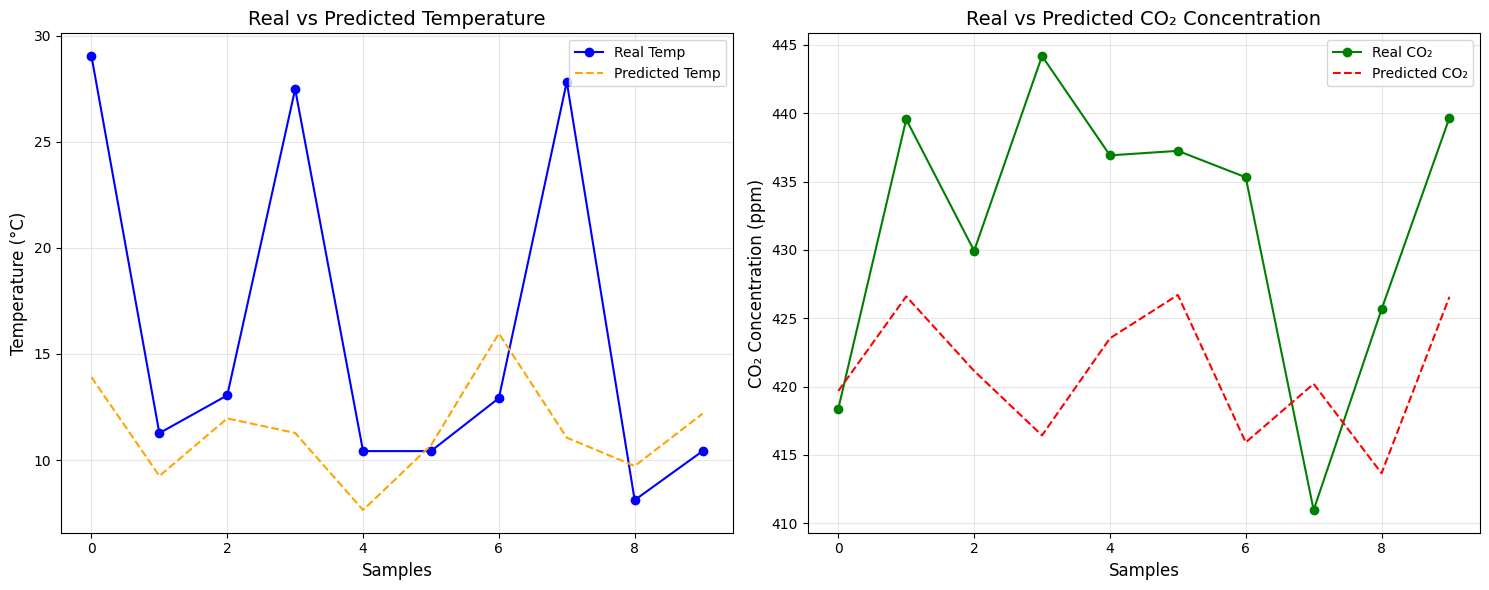

In [25]:
# Crear un DataFrame con valores reales y predicciones
y_test_df = pd.DataFrame(y_test, columns=targets)
y_pred_df = pd.DataFrame(y_pred, columns=[f"Predicted {target}" for target in targets])

# Concatenar valores reales y predicciones
comparison_df = pd.concat([y_test_df.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

# Crear gráficos para comparar valores reales y predicciones
plt.figure(figsize=(15, 6))

# Temperatura promedio
plt.subplot(1, 2, 1)
plt.plot(comparison_df.index, comparison_df["Avg_Temp (°C)"], label="Real Temp", marker="o", color="blue")
plt.plot(comparison_df.index, comparison_df["Predicted Avg_Temp (°C)"], label="Predicted Temp", linestyle="--", color="orange")
plt.title("Real vs Predicted Temperature", fontsize=14)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Concentración de CO₂
plt.subplot(1, 2, 2)
plt.plot(comparison_df.index, comparison_df["CO2_Concentration (ppm)"], label="Real CO₂", marker="o", color="green")
plt.plot(comparison_df.index, comparison_df["Predicted CO2_Concentration (ppm)"], label="Predicted CO₂", linestyle="--", color="red")
plt.title("Real vs Predicted CO₂ Concentration", fontsize=14)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("CO₂ Concentration (ppm)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

## XGBoost

In [27]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Seleccionar las variables predictoras y los objetivos
predictors = [
    "Precipitation (mm)", "Humidity (%)", "Wind_Speed (m/s)", "Solar_Irradiance (W/m²)",
    "Cloud_Cover (%)", "Urbanization_Index", "Vegetation_Index", "ENSO_Index"
]
targets = ["Avg_Temp (°C)", "CO2_Concentration (ppm)"]

# Asegurarse de que todos los predictores y objetivos sean numéricos
for column in predictors + targets:
    imputed_data[column] = pd.to_numeric(imputed_data[column], errors='coerce')

# Eliminar cualquier fila con valores faltantes en los predictores o los objetivos
filtered_data = imputed_data.dropna(subset=predictors + targets)

# Ordenar los datos por la columna de tiempo
filtered_data = filtered_data.sort_values("Time")

# Preparar los datos
X = filtered_data[predictors]
y = filtered_data[targets]

# Dividir secuencialmente en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(filtered_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Espacio de búsqueda de hiperparámetros para XGBoost
param_distributions = {
    "n_estimators": randint(100, 500),  # Número de árboles
    "max_depth": randint(3, 15),  # Profundidad máxima del árbol
    "learning_rate": uniform(0.01, 0.3),  # Tasa de aprendizaje (eta)
    "subsample": uniform(0.6, 0.4),  # Proporción de datos para cada árbol
    "colsample_bytree": uniform(0.6, 0.4),  # Fracción de características para cada árbol
    "min_child_weight": randint(1, 10),  # Peso mínimo para dividir nodos
    "gamma": uniform(0, 5),  # Reducción mínima de pérdida para dividir nodos
}

# Configurar el modelo XGBoost
xgb_model = XGBRegressor(random_state=42, objective="reg:squarederror")

# Usar MultiOutputRegressor para manejar múltiples objetivos
multioutput_xgb = MultiOutputRegressor(xgb_model)

# Configurar RandomizedSearchCV para MultiOutputRegressor
random_search_xgb = RandomizedSearchCV(
    estimator=multioutput_xgb,
    param_distributions={
        f"estimator__{key}": value for key, value in param_distributions.items()
    },
    n_iter=50,  # Número de combinaciones aleatorias a probar
    cv=3,  # Validación cruzada con 3 particiones
    scoring="neg_mean_squared_error",  # Métrica a optimizar
    verbose=2,  # Nivel de detalle en la salida
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)

# Realizar la búsqueda aleatoria de hiperparámetros
random_search_xgb.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_xgb = random_search_xgb.best_params_
print("Mejores hiperparámetros encontrados:", best_params_xgb)

# Entrenar el modelo con los mejores hiperparámetros
best_xgb_model = random_search_xgb.best_estimator_

# Predicciones con el modelo optimizado
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluación del modelo optimizado
mae_xgb = mean_absolute_error(y_test, y_pred_xgb, multioutput="raw_values")
mse_xgb = mean_squared_error(y_test, y_pred_xgb, multioutput="raw_values")
r2_xgb = r2_score(y_test, y_pred_xgb, multioutput="raw_values")

# Resultados del modelo optimizado
results_xgb = {
    "Target": targets,
    "MAE": mae_xgb,
    "MSE": mse_xgb,
    "R2": r2_xgb
}

results_xgb_df = pd.DataFrame(results_xgb)

# Mostrar los resultados
print(results_xgb_df)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__gamma=4.75357153204958, estimator__learning_rate=0.22959818254342154, estimator__max_depth=7, estimator__min_child_weight=7, estimator__n_estimators=221, estimator__subsample=0.662397808134481; total time=   0.2s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__gamma=4.75357153204958, estimator__learning_rate=0.22959818254342154, estimator__max_depth=7, estimator__min_child_weight=7, estimator__n_estimators=221, estimator__subsample=0.662397808134481; total time=   0.2s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__gamma=4.75357153204958, estimator__learning_rate=0.22959818254342154, estimator__max_depth=7, estimator__min_child_weight=7, estimator__n_estimators=221, estimator__subsample=0.662397808134481; total time=   0.2s
[CV] END estimator__colsample_bytree=0.6232334448672797, estimator__gamma=4.330880728874676, estim